## 📊 Exploratory Data Analysis (EDA)

EDA dilakukan untuk memahami karakteristik data, kualitasnya, serta pola-pola yang mungkin berguna untuk tahap modeling. Berikut tahapan yang telah dilakukan:

### 1. Struktur dan Tipe Data
- Menggunakan `df.info()` untuk melihat jumlah baris, tipe data, dan jumlah nilai non-null.
- Ditemukan bahwa beberapa kolom seperti `co2` memiliki missing values signifikan (~60%).

### 2. Parsing Timestamp
- Kolom `timestamp` dikonversi ke tipe `datetime` agar dapat digunakan dalam analisis berbasis waktu.

### 3. Analisis Missing Value
- Dihitung jumlah dan persentase missing value per kolom.
- Visualisasi missing value

### 4. Statistik Deskriptif
- Dilakukan analisis statistik (mean, median, std, min, max, quartiles) terhadap semua fitur numerik.
- Digunakan untuk mendeteksi outlier dan memahami distribusi awal data.

### Distribusi dan Outlier
- Visualisasi histogram dan boxplot untuk fitur numerik.
- Ditemukan beberapa outlier


### 6. Korelasi Antar Variabel
- Matriks korelasi divisualisasikan menggunakan heatmap.

### 7. Time-Series Plot
- Memplot tren semua fitur terhadap waktu untuk mengevaluasi pola dan fluktuasi alami.

### 8. Resampling per Jam
- Data diringkas per jam (`resample('H')`) untuk mengurangi noise dan memahami tren makro.

### 9. Pola Harian
- Rata-rata per jam (jam 0–23) dihitung untuk setiap fitur.

### 10. Heatmap Jam vs Hari
- Heatmap 2D jam vs tanggal untuk fitur seperti `temperature` dan `pyrano`.
- Digunakan untuk mengidentifikasi pola waktu dan potensi anomali harian.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pindah ke folder utama proyek
%cd /content/drive/MyDrive/DBS/

/content/drive/MyDrive/DBS


In [ ]:
import os
print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/DBS


## Import Library

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
# Baca file hasil sampling yg sudah di merge
df = pd.read_csv('COLLECTING-DATA/data_output_collecting.csv')

## Cek Struktur Data

In [ ]:
# Mengecek struktur umum DataFrame
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    20160 non-null  object 
 1   co2          7732 non-null   float64
 2   temperature  17754 non-null  float64
 3   humidity     17754 non-null  float64
 4   rainfall     17754 non-null  float64
 5   pyrano       17754 non-null  float64
dtypes: float64(5), object(1)
memory usage: 945.1+ KB


,timestamp,co2,temperature,humidity,rainfall,pyrano
0,2025-04-24 00:00:00,NaN,24.450,100.0,0.0,0.0
1,2025-04-24 00:01:00,NaN,NaN,NaN,NaN,NaN
2,2025-04-24 00:02:00,NaN,NaN,NaN,NaN,NaN
3,2025-04-24 00:03:00,NaN,NaN,NaN,NaN,NaN
4,2025-04-24 00:04:00,NaN,24.469,100.0,0.0,0.0
5,2025-04-24 00:05:00,NaN,24.394,100.0,0.0,0.0
6,2025-04-24 00:06:00,519.0,24.437,100.0,0.0,0.0
7,2025-04-24 00:07:00,519.0,24.410,100.0,0.0,0.0
8,2025-04-24 00:08:00,NaN,24.394,100.0,0.0,0.0
9,2025-04-24 00:09:00,NaN,24.380,100.0,0.0,0.0


### Hasil:
- Dataset terdiri dari **20.160 baris**
- Terdapat **6 kolom**: 1 kolom waktu (`timestamp`) dan 5 fitur numerik
- Kolom `co2` hanya memiliki **7732 nilai**, artinya ada **banyak missing values**
- Kolom `timestamp` masih dalam bentuk **object**, belum diubah ke `datetime`

Langkah selanjutnya adalah konversi `timestamp` menjadi `datetime` untuk analisis time-series.

In [ ]:
# Menampilkan dimensi data (jumlah baris dan kolom)
print(df.shape)

# Menampilkan 5 baris pertama dari dataframe
print(df.head())

(20160, 6)
             timestamp  co2  temperature  humidity  rainfall  pyrano
0  2025-04-24 00:00:00  NaN       24.450     100.0       0.0     0.0
1  2025-04-24 00:01:00  NaN          NaN       NaN       NaN     NaN
2  2025-04-24 00:02:00  NaN          NaN       NaN       NaN     NaN
3  2025-04-24 00:03:00  NaN          NaN       NaN       NaN     NaN
4  2025-04-24 00:04:00  NaN       24.469     100.0       0.0     0.0


## Konversi Kolom `timestamp` ke `datetime`

In [ ]:
# Mengonversi kolom 'timestamp' dari object (string) menjadi datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Verifikasi apakah sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    20160 non-null  datetime64[ns]
 1   co2          7732 non-null   float64       
 2   temperature  17754 non-null  float64       
 3   humidity     17754 non-null  float64       
 4   rainfall     17754 non-null  float64       
 5   pyrano       17754 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 945.1 KB


Format data timestamp berhasil diubah ke datetime

## Simpan CSV

In [ ]:
# Simpan dataset setelah konversi timestamp ke file CSV baru
file_name = 'data_eda_step1.csv'
df.to_csv(file_name, index=False)

# Print nama file yang disimpan
print(f"Dataset telah disimpan dengan nama: {file_name}")

Dataset telah disimpan dengan nama: data_eda_step1.csv


## Pemeriksaan Missing Values

In [ ]:
# Tampilkan jumlah missing values per kolom
df.isnull().sum()

,0
timestamp,0
co2,12428
temperature,2406
humidity,2406
rainfall,2406
pyrano,2406


## Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif dari fitur numerik
df.describe()

,timestamp,co2,temperature,humidity,rainfall,pyrano
count,20160,7732.000000,17754.000000,17754.000000,17754.000000,17754.000000
mean,2025-04-30 23:59:30,458.713658,28.244999,87.243206,0.001284,182.561282
min,2025-04-24 00:00:00,341.000000,21.999000,43.536000,0.000000,0.000000
25%,2025-04-27 11:59:45,388.000000,24.450000,73.677750,0.000000,0.000000
50%,2025-04-30 23:59:30,439.000000,25.849000,95.445000,0.000000,2.000000
75%,2025-05-04 11:59:15,520.000000,32.464000,100.000000,0.000000,293.000000
max,2025-05-07 23:59:00,719.000000,50.993000,100.000000,1.200000,1332.000000
std,NaN,78.077866,4.796163,15.555596,0.023364,287.667100


Dari hasil `df.describe()`, kita bisa melihat insight berikut:

### 1. `co2`
- **Mean:** 458.71 ppm
- **Min/Max:** 341 – 719 ppm
- **Std dev:** 78.08 → cukup tinggi, menunjukkan variasi besar
- **Missing values:** Banyak (hanya 7732 dari 20160 yang tersedia)

*Catatan:* Nilai CO₂ ini masih masuk akal untuk udara luar-ruangan maupun dalam-ruangan.

---

### 2. `temperature`
- **Rata-rata:** 28.24 °C
- **Min/Max:** 22 – 51 °C
- **25%-75%:** 24.45 – 32.46 °C
- **Max:** 50.99 °C → mungkin perlu dicek, bisa jadi outlier

*Catatan:* Suhu di atas 50 °C cukup ekstrem, terutama jika ini bukan data di gurun — bisa jadi outlier atau kesalahan pencatatan.

---

### 3. `humidity`
- **Mean:** 87.24%
- **Min:** 43.53%, **Max:** 100%
- Sebagian besar data berada di atas 70% (25% quantile: 73.68%)

*Catatan:* Rentang ini wajar untuk daerah tropis atau lembab.

---

### 4. `rainfall`
- **Mean:** sangat kecil (0.00128), mayoritas 0
- **Max:** hanya 1.2 → mungkin satuan mm atau inch, perlu dicek
- **25%, 50%, 75%:** semua 0 → artinya banyak waktu tidak hujan

*Catatan:* Data curah hujan ini sangat sparse — artinya kejadian hujan sangat jarang dalam periode ini.

---

### 5. `pyrano`
- **Mean:** 182.56
- **Max:** 1332 — cukup tinggi, ini bisa terjadi di siang terik
- **25% – 50% – 75%:** distribusi sangat skewed ke kanan (banyak nol → malam atau mendung?)

*Catatan:* Nilai 0 kemungkinan besar menunjukkan waktu malam atau mendung, dan ini wajar.

---

### Kesimpulan Sementara:
- Fitur `temperature`, `co2`, dan `pyrano` memiliki outlier yang layak dicermati lebih lanjut secara visual (boxplot).
- Banyaknya nilai nol di `rainfall` dan `pyrano` bisa alami (berdasarkan waktu), tapi tetap penting dicek secara time-series.
- Perlu pertimbangan untuk penanganan data hilang terutama pada `co2`.

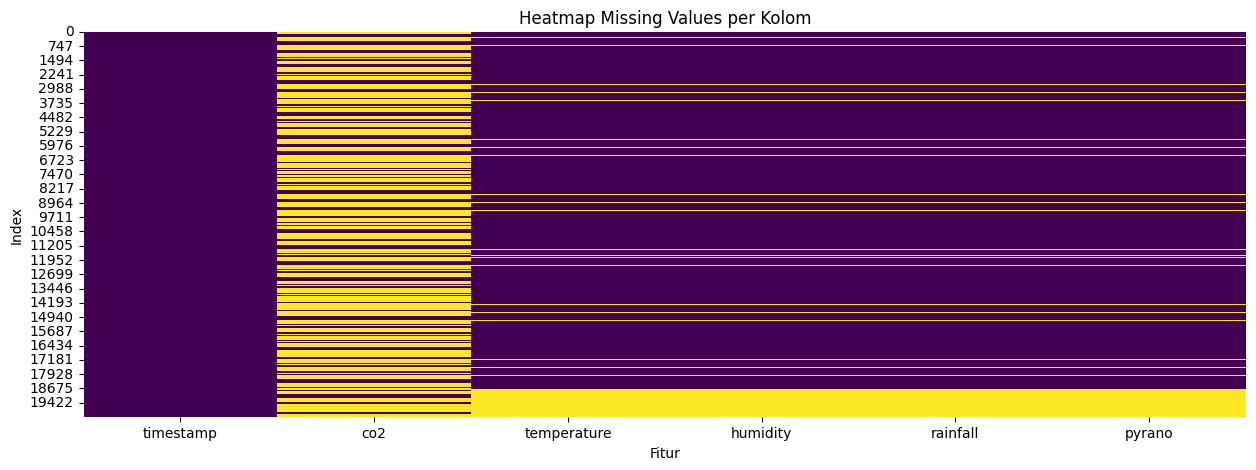

In [ ]:
# Visualisasi missing values menggunakan heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values per Kolom')
plt.xlabel('Fitur')
plt.ylabel('Index')
plt.show()

## Visualisasi Distribusi dan Outlier

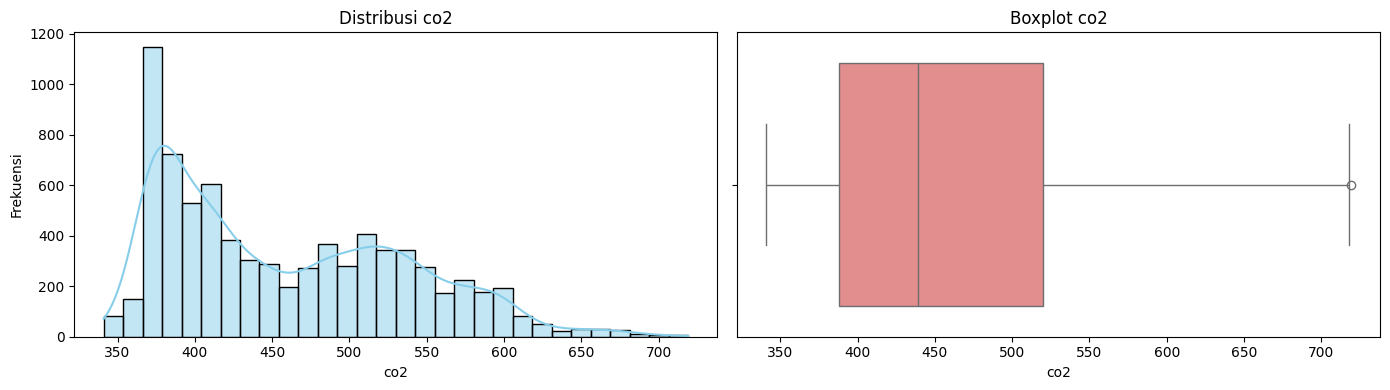

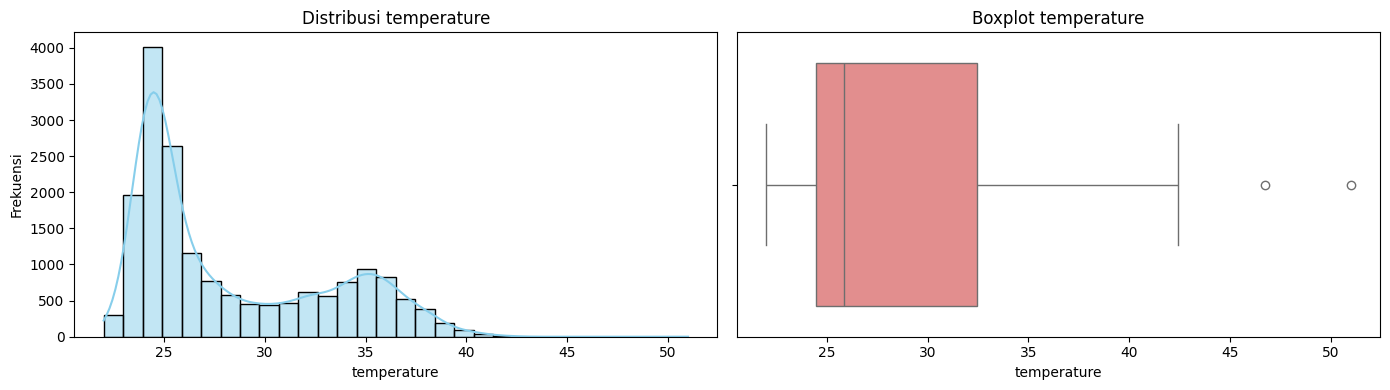

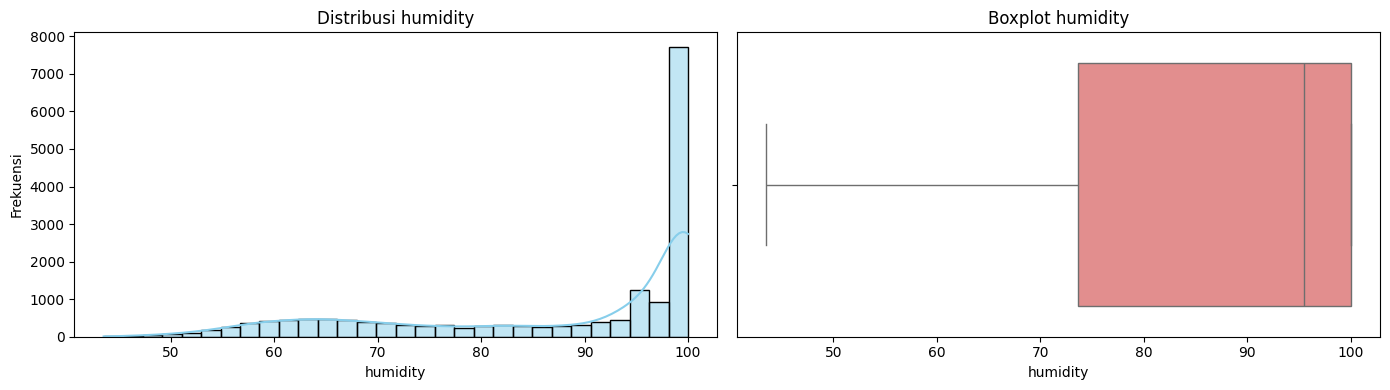

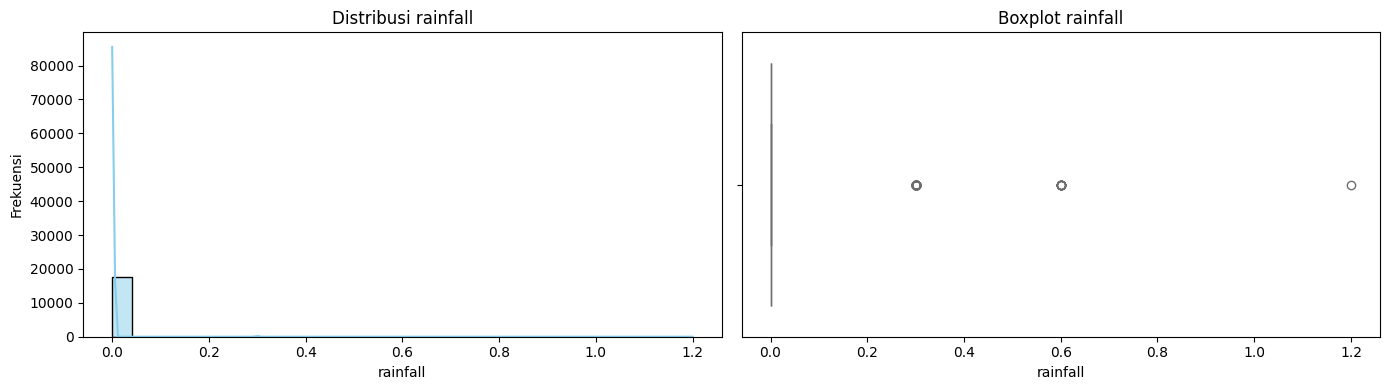

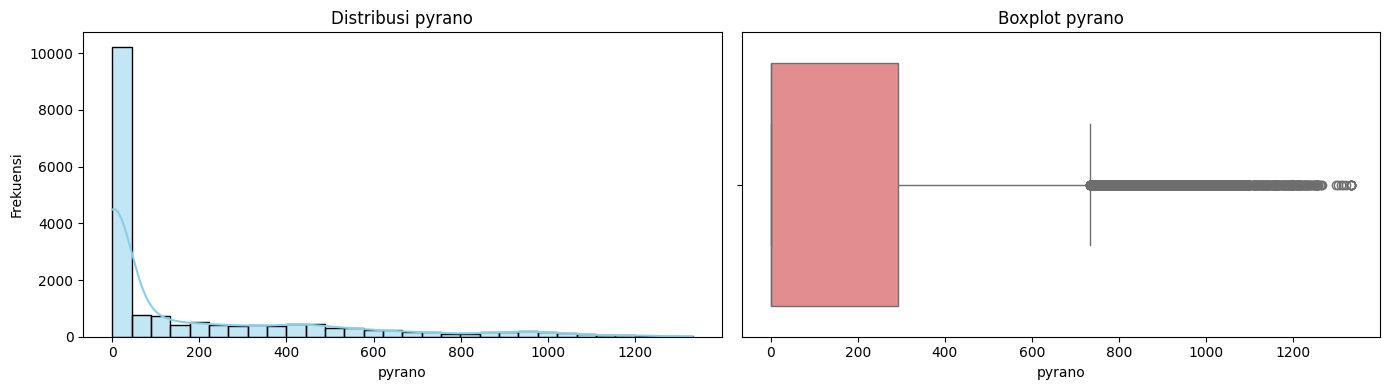

In [ ]:
# Daftar kolom numerik yang akan divisualisasikan
num_cols = ['co2', 'temperature', 'humidity', 'rainfall', 'pyrano']

# Loop visualisasi histogram dan boxplot per kolom
for col in num_cols:
    plt.figure(figsize=(14, 4))

    # Histogram dengan KDE (Kernel Density Estimation)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Boxplot untuk mendeteksi outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

## Analisis Korelasi Antar Variabel

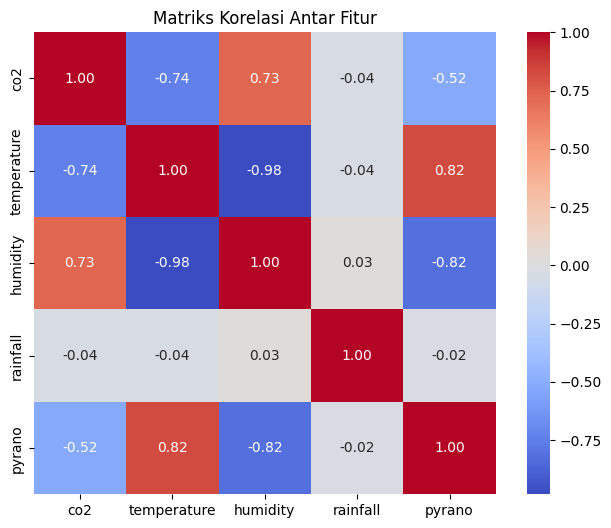

In [ ]:
# Hitung korelasi antar fitur numerik (mengabaikan timestamp)
corr = df[['co2', 'temperature', 'humidity', 'rainfall', 'pyrano']].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

## Time Series Plot Setiap Fitur

Visualisasi ini bertujuan melihat:
- **Tren** jangka pendek (naik/turun)
- **Pola harian** (misalnya `pyrano` hanya muncul di siang hari)
- **Anomali** atau data yang hilang pada rentang waktu tertentu

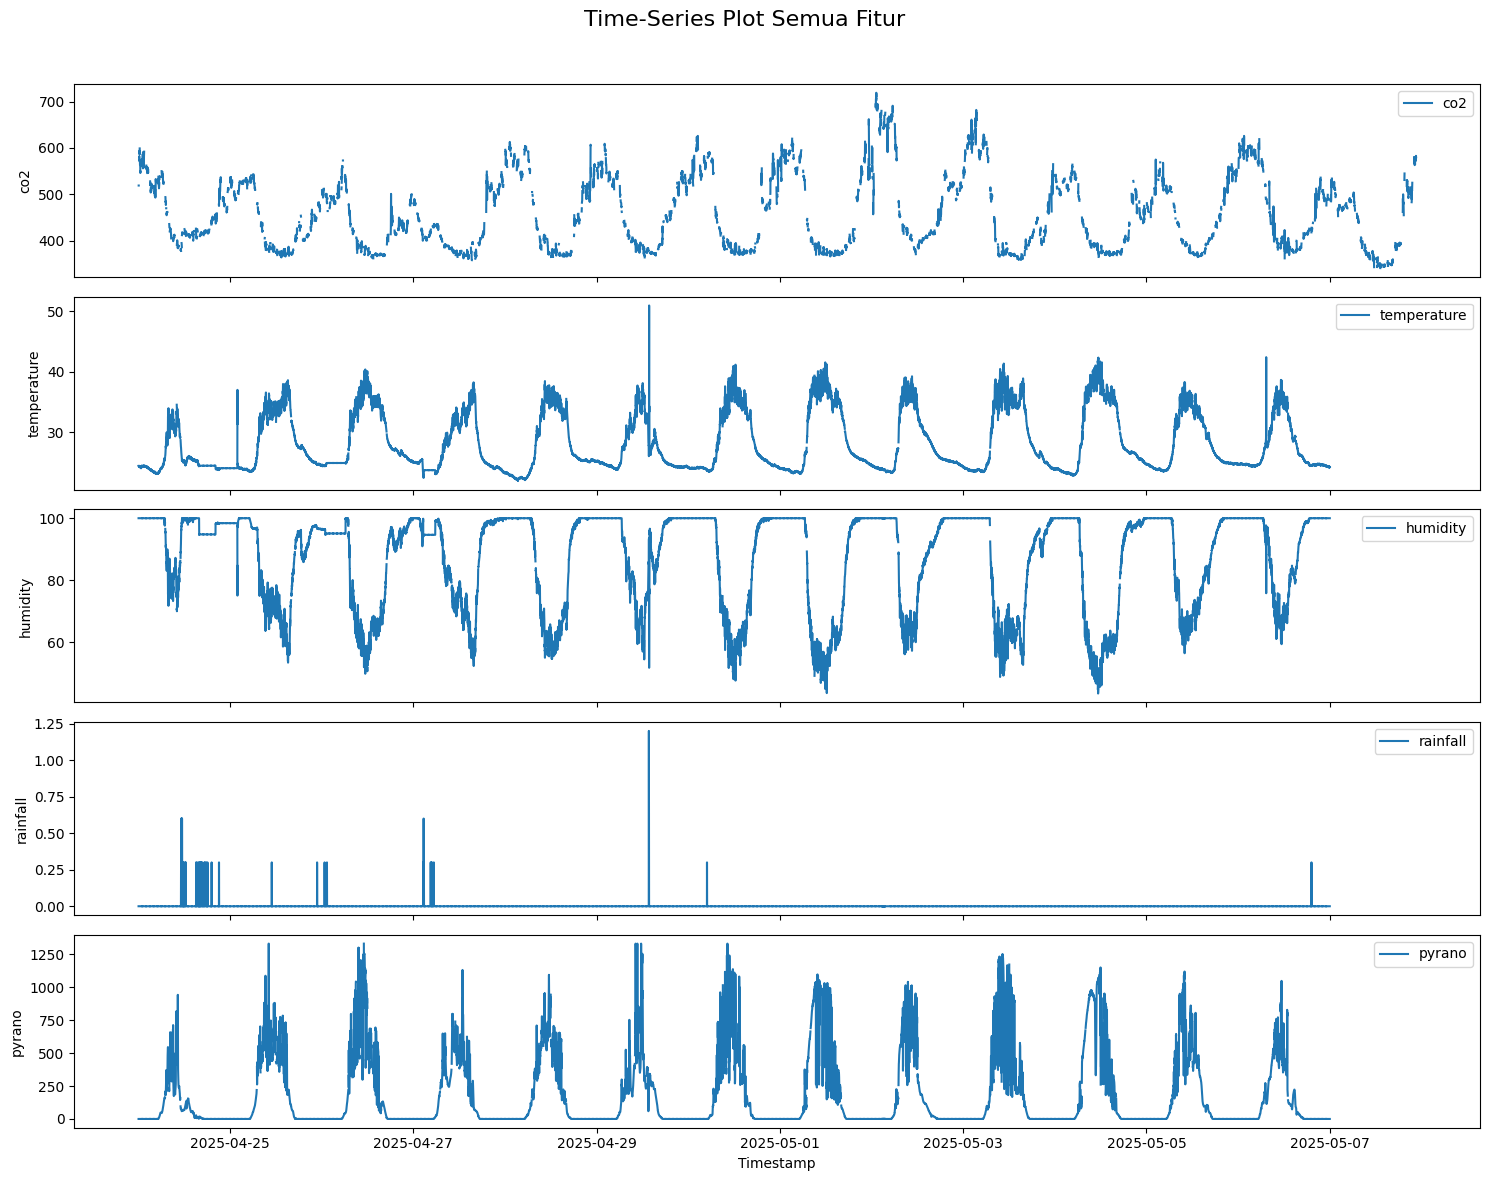

In [ ]:
# Pastikan timestamp dijadikan index
df_time = df.set_index('timestamp')

# Plot time-series untuk semua fitur numerik
fig, axs = plt.subplots(len(df_time.columns), 1, figsize=(15, 12), sharex=True)

for i, col in enumerate(df_time.columns):
    axs[i].plot(df_time.index, df_time[col], label=col, color='tab:blue')
    axs[i].set_ylabel(col)
    axs[i].legend(loc='upper right')

plt.suptitle('Time-Series Plot Semua Fitur', fontsize=16)
plt.xlabel('Timestamp')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Resampling per Jam

Merangkum data per jam agar:
- Lebih mudah dibaca (tidak terlalu granular)
- Menunjukkan **pola waktu** yang lebih jelas seperti siklus harian

<ipython-input-37-c98f62ba0e11>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.set_index('timestamp').resample('H').mean()


<Figure size 1500x600 with 0 Axes>

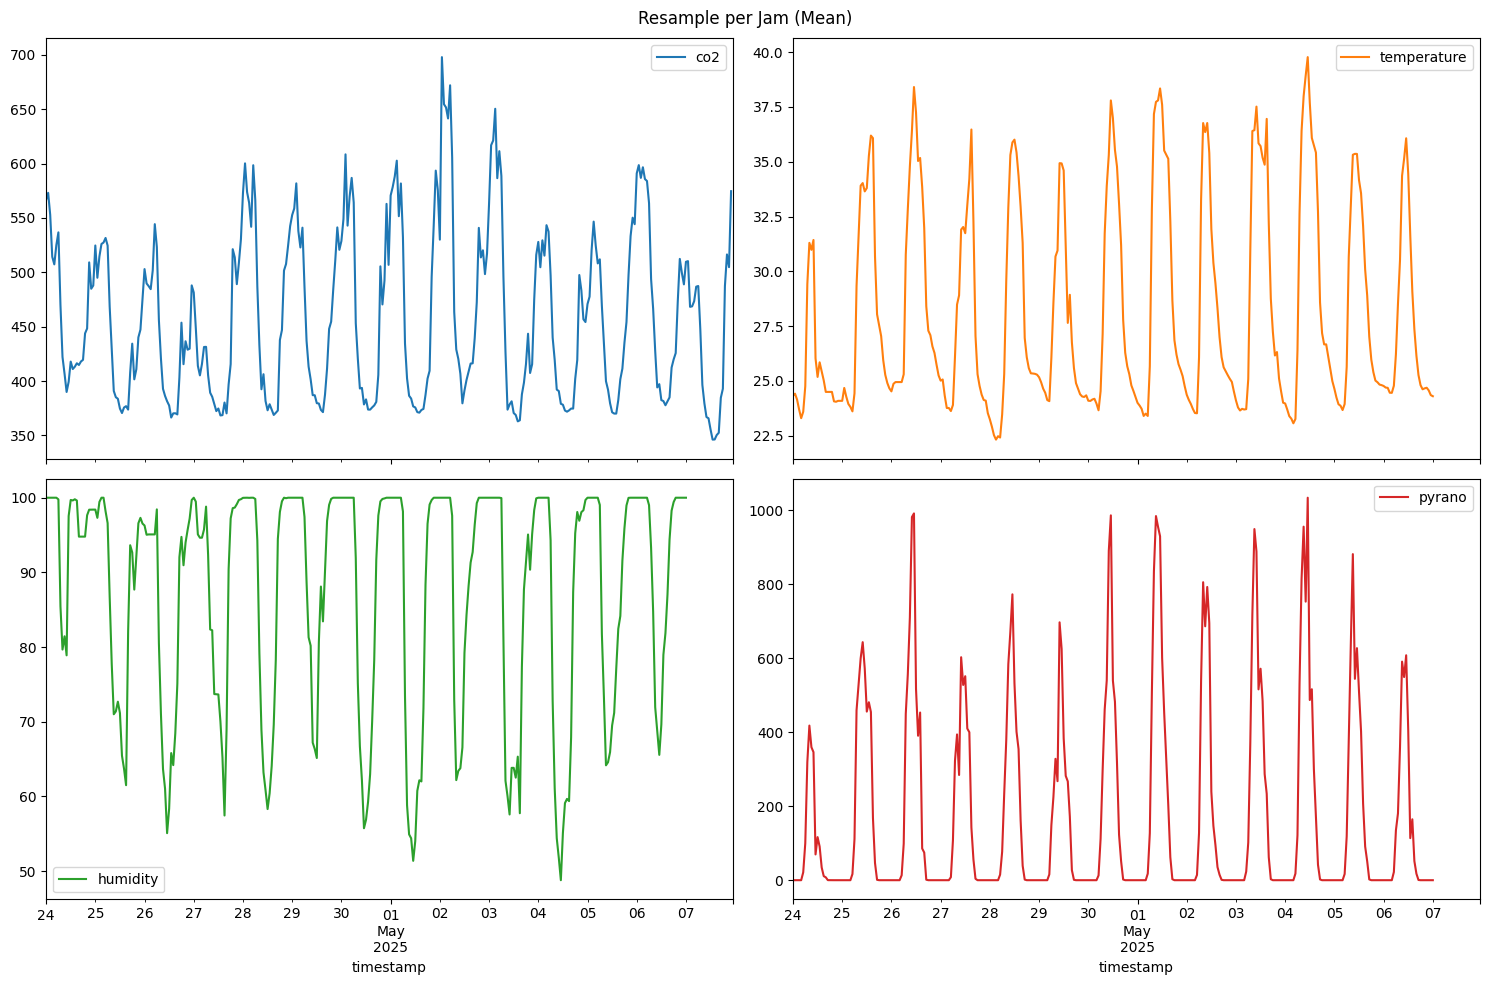

In [ ]:
# Pastikan timestamp jadi datetime dan index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_resampled = df.set_index('timestamp').resample('H').mean()

# Plot hasil resample per jam
plt.figure(figsize=(15, 6))
df_resampled[['co2', 'temperature', 'humidity', 'pyrano']].plot(subplots=True, figsize=(15, 10), title='Resample per Jam (Mean)', layout=(2, 2), sharex=True)
plt.tight_layout()
plt.show()

## Pola Harian (Rata-rata per Jam)

Mengetahui pola setiap fitur berdasarkan waktu dalam sehari (jam 0–23)

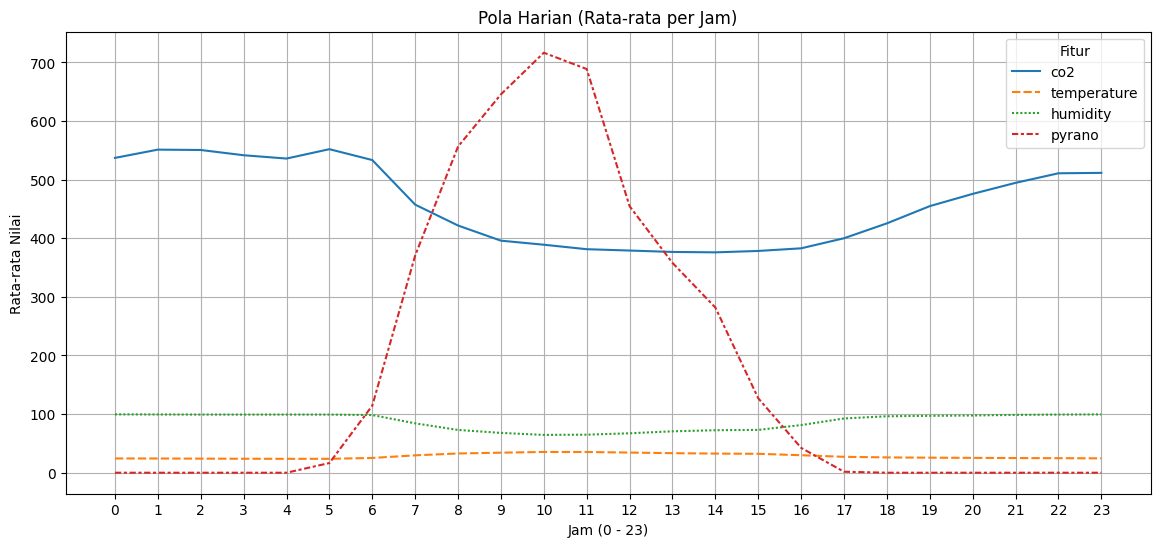

In [ ]:
# Buat kolom jam dari timestamp
df['hour'] = df['timestamp'].dt.hour

# Hitung rata-rata per jam
hourly_pattern = df.groupby('hour')[['co2', 'temperature', 'humidity', 'pyrano']].mean()

# Plot pola harian per fitur
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_pattern)
plt.title('Pola Harian (Rata-rata per Jam)')
plt.xlabel('Jam (0 - 23)')
plt.ylabel('Rata-rata Nilai')
plt.grid(True)
plt.legend(title='Fitur')
plt.xticks(range(0, 24))
plt.show()

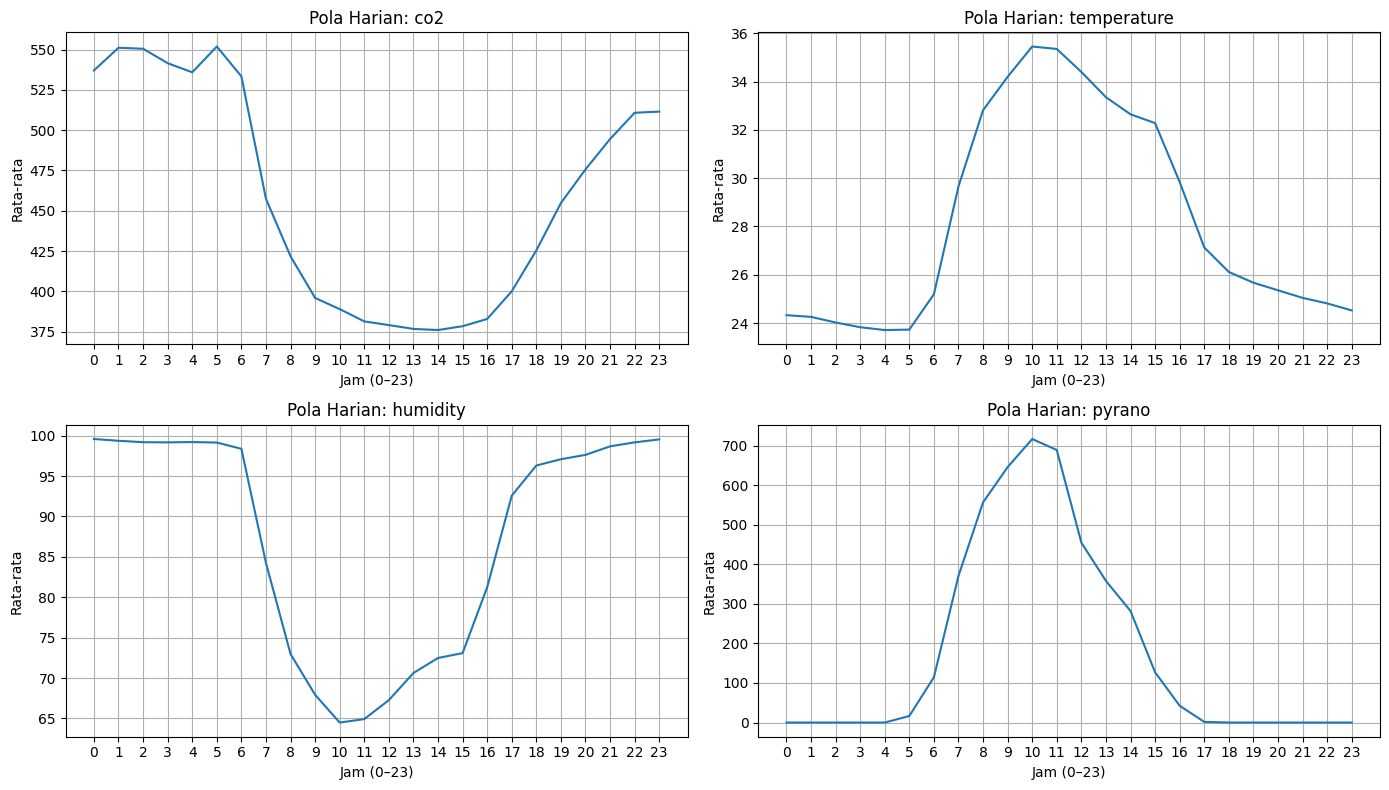

In [ ]:
# Plot ulang pola harian per fitur agar lebih jelas per jam
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

features = ['co2', 'temperature', 'humidity', 'pyrano']
for ax, col in zip(axs.flat, features):
    sns.lineplot(x=hourly_pattern.index, y=hourly_pattern[col], ax=ax)
    ax.set_title(f'Pola Harian: {col}')
    ax.set_xlabel('Jam (0–23)')
    ax.set_ylabel('Rata-rata')
    ax.set_xticks(range(0, 24))  # <- Ini memastikan semua jam 0-23 muncul
    ax.grid(True)

plt.tight_layout()
plt.show()

## Heatmap Pola Waktu (Jam vs Hari)

Visualisasi ini bertujuan:
- Melihat **pola berulang harian** (misal suhu naik siang)
- Deteksi hari-hari dengan **anomali suhu atau pola tidak biasa**
- Mendeteksi **missing block** jika ada bagian kosong

Interpretasi:
- **Sumbu X = Jam (0-23)**
- **Sumbu Y = Tanggal**
- **Warna = rata-rata suhu tiap jam di tiap hari** **bold text**

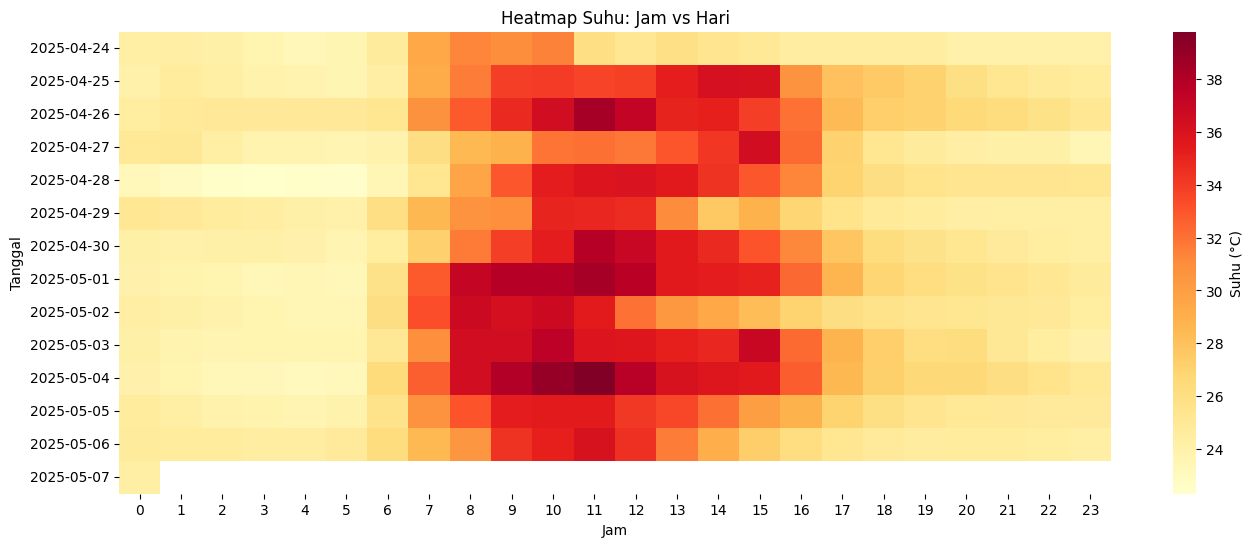

In [ ]:
# Buat kolom tanggal dan jam
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# Pivot table untuk fitur yang ingin divisualisasikan, contoh: temperature
pivot_temp = df.pivot_table(index='date', columns='hour', values='temperature', aggfunc='mean')

# Plot heatmap temperature
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_temp, cmap='YlOrRd', cbar_kws={'label': 'Suhu (°C)'})
plt.title('Heatmap Suhu: Jam vs Hari')
plt.xlabel('Jam')
plt.ylabel('Tanggal')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    20160 non-null  datetime64[ns]
 1   co2          7732 non-null   float64       
 2   temperature  17754 non-null  float64       
 3   humidity     17754 non-null  float64       
 4   rainfall     17754 non-null  float64       
 5   pyrano       17754 non-null  float64       
 6   hour         20160 non-null  int32         
 7   date         20160 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), object(1)
memory usage: 1.2+ MB
